# Ensemble classifiers
Filippo Fantinato 2041620

Here you can find the notebook where I tried RandomForest, AdaBoost and Stacking classifiers on the diamonds dataset availabel on the seaborn library.

In [12]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Preprocessing

First of all let's check whether there are null values and since there arent' I can go on by converting the string values into integer.

In [15]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [16]:
cut_categories = set(diamonds['cut'].to_list())
cut_categories

{'Fair', 'Good', 'Ideal', 'Premium', 'Very Good'}

In [17]:
color_categories = set(diamonds['color'].to_list())
color_categories

{'D', 'E', 'F', 'G', 'H', 'I', 'J'}

In [18]:
clarity_categories = set(diamonds['clarity'].to_list())
clarity_categories

{'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'}

In [19]:
diamonds = diamonds.replace({
    "cut":      {cut_c: i for i, cut_c in enumerate(cut_categories)},
    "color":    {color_c: i for i, color_c in enumerate(color_categories)},
    "clarity":  {clarity_c: i for i, clarity_c in enumerate(clarity_categories)}
  })
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,6,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,7,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,6,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,4,0,63.3,58.0,335,4.34,4.35,2.75


Now we can split the datatset in train and test ones.

In [20]:
X = diamonds.drop(['cut'], axis = 1)
y = diamonds['cut']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = GridSearchCV(RandomForestClassifier(), {"n_estimators": [100, 200, 300], "max_depth": range(1, 10, 2)})
rfc.fit(X_train, y_train)
rfc_score = rfc.score(X_test, y_test)

print("Best estimator:", rfc.best_estimator_)
print("Score: ", rfc_score)

Best estimator: RandomForestClassifier(max_depth=9, n_estimators=300)
Score:  0.7524100852799407


## AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = GridSearchCV(AdaBoostClassifier(), {"n_estimators": range(10, 120, 20), "learning_rate": [1e-3, 1e-2, 5e-2, 1e-1]})
adaboost.fit(X_train, y_train)
adaboost_score = adaboost.score(X_test, y_test)

print("Best estimator:", adaboost.best_estimator_)
print("Score: ", adaboost.score(X_test, y_test))

Best estimator: AdaBoostClassifier(learning_rate=0.1, n_estimators=110)
Score:  0.6651835372636262


## Stacking

After few tries, I end up exploiting KNN, RandomForest and GaussianNB classifiers.

In [26]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=4)),
    ('rfc', RandomForestClassifier(random_state=42)),
    ('gnb', GaussianNB())
]
stacking = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression()
)
stacking.fit(X_train, y_train)

stacking_score = stacking.score(X_test, y_test)

print("Score: ", stacking_score)

Score:  0.7879124953652206


## Conclusions

As can be seen from the graph below, the stacking classifier is slightly better than random forest and much better than adaboost.

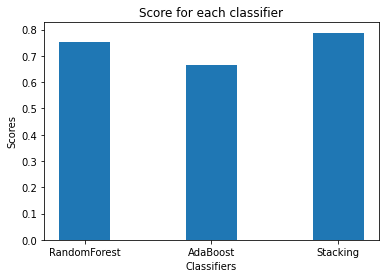

In [28]:
import matplotlib.pyplot as plt
   
data = {
  'RandomForest': rfc_score, 
  'AdaBoost': adaboost_score, 
  'Stacking': stacking_score,
}
classifiers = list(data.keys())
scores = list(data.values())

plt.bar(classifiers, scores, width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("Scores")
plt.title("Score for each classifier")
plt.show()